In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
project_path = '/content/drive/MyDrive/Labelled_Multiclass_Dataset'
os.chdir(project_path)

In [3]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('/content/drive/MyDrive/Labelled_Multiclass_Dataset/aggregated_data.csv')

In [5]:
data

,start_time,end_time_x,total_forward_packets_window,total_backward_packets_window,total_forward_bytes_window,total_backward_bytes_window,average_packet_size_fwd_window,average_packet_size_bwd_window,flow_duration_window,packet_count_window,...,bwd_iat_mean,bwd_iat_max,bwd_iat_min,bwd_iat_tot,bwd_blk_rate_avg,end_time_y,total_packets,total_bytes,Label,BinLabel
0,2024-08-13 08:00:00,2024-08-13 08:00:05,261,158,28218,11769,64.239935,56.293254,1370937322,126,...,0.0,0,0,0,0.0,2024-08-13 08:00:00,2,114,XMasAttack,1
1,2024-08-13 08:00:56,2024-08-13 08:01:01,42,9,6232,671,134.525210,8.519608,208424228,17,...,0.0,0,0,0,0.0,2024-08-13 08:00:00,2,114,XMasAttack,1
2,2024-08-13 08:00:57,2024-08-13 08:01:02,42,9,6232,671,134.525210,8.519608,208424228,17,...,0.0,0,0,0,0.0,2024-08-13 08:00:00,2,114,XMasAttack,1
3,2024-08-13 08:00:58,2024-08-13 08:01:03,42,9,6232,671,134.525210,8.519608,208424228,17,...,0.0,0,0,0,0.0,2024-08-13 08:00:00,2,114,XMasAttack,1
4,2024-08-13 08:00:59,2024-08-13 08:01:04,42,9,6232,671,134.525210,8.519608,208424228,17,...,0.0,0,0,0,0.0,2024-08-13 08:00:00,2,114,XMasAttack,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23981,2024-08-26 20:15:56,2024-08-26 20:16:01,1,0,121,0,121.000000,0.000000,0,1,...,0.0,0,0,0,0.0,2024-08-26 20:15:00,1,62,Benign,0
23982,2024-08-26 20:15:57,2024-08-26 20:16:02,1,0,121,0,121.000000,0.000000,0,1,...,0.0,0,0,0,0.0,2024-08-26 20:15:00,1,62,Benign,0
23983,2024-08-26 20:15:58,2024-08-26 20:16:03,1,0,121,0,121.000000,0.000000,0,1,...,0.0,0,0,0,0.0,2024-08-26 20:15:00,1,62,Benign,0
23984,2024-08-26 20:15:59,2024-08-26 20:16:04,1,0,121,0,121.000000,0.000000,0,1,...,0.0,0,0,0,0.0,2024-08-26 20:15:00,1,62,Benign,0


In [6]:
X = data.drop(columns=['BinLabel', 'Label', 'src_ip', 'dst_ip', 'start_time', 'end_time_x', 'end_time_y', 'time_diff', 'time_diff_seconds'])
y = data['BinLabel']  # Your target variable for training

In [7]:
# Check for NaN values in the features
print(X.isna().sum())  # Check how many NaN values are in each feature

total_forward_packets_window      0
total_backward_packets_window     0
total_forward_bytes_window        0
total_backward_bytes_window       0
average_packet_size_fwd_window    0
average_packet_size_bwd_window    0
flow_duration_window              0
packet_count_window               0
mean_iat_fwd_window               0
stddev_iat_fwd_window             0
min_iat_fwd_window                0
max_iat_fwd_window                0
mean_iat_bwd_window               0
stddev_iat_bwd_window             0
min_iat_bwd_window                0
max_iat_bwd_window                0
flow_rate_packets_window          0
flow_rate_bytes_window            0
flow_direction_ratio_window       0
byte_direction_ratio_window       0
src_ip_entropy_window             0
dst_ip_entropy_window             0
src_port                          0
dst_port                          0
protocol                          0
flow_duration                     0
total_forward_packets             0
total_backward_packets      

In [8]:
# Alternatively, check if any NaNs exist
print(X.isna().any().any())  # Returns True if any NaN values exist

False


In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [10]:
# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Fit and transform

In [11]:
# After scaling
print(np.isinf(X_scaled).any())  # Check if scaling caused infinite values

False


In [12]:
# Apply PCA to reduce dimensionality if necessary
pca = PCA(n_components=0.95)  # Keeps 95% of variance
X_pca = pca.fit_transform(X_scaled)

In [13]:
# Exploring Explained Variance
print(pca.explained_variance_ratio_)

[0.24839734 0.14720777 0.10802715 0.09397636 0.07876537 0.05884379
 0.04937154 0.03761753 0.02905087 0.02626877 0.01847549 0.01552589
 0.01451735 0.01016872 0.00948141 0.00880018]


In [14]:
# Exploring our PCA Data
expl_var = pca.explained_variance_ratio_
df_expl_var = pd.DataFrame(
    data=zip(range(1, len(expl_var) + 1), expl_var, expl_var.cumsum()),
    columns=['PCA', 'Explained Variance (%)', 'Total Explained Variance (%)']
    ).set_index('PCA').mul(100).round(1)
print(df_expl_var)

     Explained Variance (%)  Total Explained Variance (%)
PCA                                                      
1                      24.8                          24.8
2                      14.7                          39.6
3                      10.8                          50.4
4                       9.4                          59.8
5                       7.9                          67.6
6                       5.9                          73.5
7                       4.9                          78.5
8                       3.8                          82.2
9                       2.9                          85.1
10                      2.6                          87.8
11                      1.8                          89.6
12                      1.6                          91.2
13                      1.5                          92.6
14                      1.0                          93.6
15                      0.9                          94.6
16            

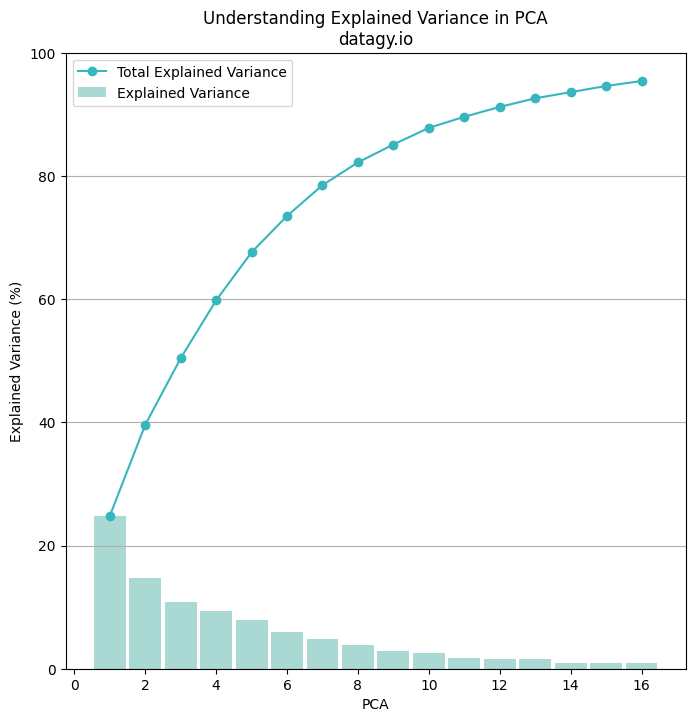

In [15]:
# Plotting our explained variance
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8,8))
ax.bar(x=df_expl_var.index, height=df_expl_var['Explained Variance (%)'], label='Explained Variance', width=0.9, color='#AAD8D3')
ax.plot(df_expl_var['Total Explained Variance (%)'], label='Total Explained Variance', marker='o', c='#37B6BD')

plt.ylim(0, 100)
plt.ylabel('Explained Variance (%)')
plt.xlabel('PCA')
plt.grid(True, axis='y')
plt.title('Understanding Explained Variance in PCA\ndatagy.io')
plt.legend()

In [ ]:
# Random forest classfier for binary

In [ ]:
from sklearn.ensemble import RandomForestClassifier


# Train a Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_pca, y)

RandomForestClassifier(random_state=42)

In [ ]:
# Perform 5-fold cross-validation
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(rf, X_pca, y, cv=5, scoring='accuracy')

# Calculate the mean and standard deviation of the accuracy across the folds
print(f"Cross-validated accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")

Cross-validated accuracy: 0.9990 (+/- 0.0008)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Train the Random Forest model on the training set
rf.fit(X_train, y_train)

# Predict on the test set
y_pred = rf.predict(X_test)

In [ ]:
# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[4628    0]
 [   0  170]]


In [ ]:
# Generate classification report
report = classification_report(y_test, y_pred, target_names=['Benign', 'Attack'])
print("Classification Report:")
print(report)

# Specificity calculation
tn, fp, fn, tp = conf_matrix.ravel()
specificity = tn / (tn + fp)
print(f"Specificity: {specificity:.4f}")

Classification Report:
              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00      4628
      Attack       1.00      1.00      1.00       170

    accuracy                           1.00      4798
   macro avg       1.00      1.00      1.00      4798
weighted avg       1.00      1.00      1.00      4798

Specificity: 1.0000


In [ ]:
# K-Nearest Neighbor

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_pca, y)

KNeighborsClassifier()

In [ ]:
# Perform 5-fold cross-validation
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(knn, X_pca, y, cv=5, scoring='accuracy')

# Calculate the mean and standard deviation of the accuracy across the folds
print(f"Cross-validated accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")

Cross-validated accuracy: 0.9982 (+/- 0.0012)


In [ ]:
# Train the Random Forest model on the training set
knn.fit(X_train, y_train)
# Predict on the test set
y_pred_knn = knn.predict(X_test)

In [ ]:
# Compute confusion matrix for dt
conf_matrix = confusion_matrix(y_test, y_pred_knn)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[4627    1]
 [   2  168]]


In [ ]:
# Generate classification report
report = classification_report(y_test, y_pred_knn, target_names=['Benign', 'Attack'])
print("Classification Report:")
print(report)

# Specificity calculation
tn, fp, fn, tp = conf_matrix.ravel()
specificity = tn / (tn + fp)
print(f"Specificity: {specificity:.4f}")

Classification Report:
              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00      4628
      Attack       0.99      0.99      0.99       170

    accuracy                           1.00      4798
   macro avg       1.00      0.99      1.00      4798
weighted avg       1.00      1.00      1.00      4798

Specificity: 0.9998


In [ ]:
# Decision tree classifier for binary classification

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_pca, y)

DecisionTreeClassifier(random_state=42)

In [ ]:
# Perform 5-fold cross-validation
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(dt, X_pca, y, cv=5, scoring='accuracy')

# Calculate the mean and standard deviation of the accuracy across the folds
print(f"Cross-validated accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")

Cross-validated accuracy: 0.9981 (+/- 0.0010)


In [ ]:
# Train the Decision Tree model on the training set
dt.fit(X_train, y_train)
# Predict on the test set
y_pred1 = dt.predict(X_test)

In [ ]:
# Compute confusion matrix for dt
conf_matrix = confusion_matrix(y_test, y_pred1)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[4627    1]
 [   0  170]]


In [ ]:
# Generate classification report
report = classification_report(y_test, y_pred1, target_names=['Benign', 'Attack'])
print("Classification Report:")
print(report)

# Specificity calculation
tn, fp, fn, tp = conf_matrix.ravel()
specificity = tn / (tn + fp)
print(f"Specificity: {specificity:.4f}")

Classification Report:
              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00      4628
      Attack       0.99      1.00      1.00       170

    accuracy                           1.00      4798
   macro avg       1.00      1.00      1.00      4798
weighted avg       1.00      1.00      1.00      4798

Specificity: 0.9998


In [ ]:
# Support vector for binary classification

In [ ]:
from sklearn.svm import SVC
svm = SVC(kernel = 'poly', C = 1, random_state = 0, probability = True)
svm.fit(X_pca, y)

SVC(C=1, kernel='poly', probability=True, random_state=0)

In [ ]:
# Perform 5-fold cross-validation
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(svm, X_pca, y, cv=5, scoring='accuracy')

# Calculate the mean and standard deviation of the accuracy across the folds
print(f"Cross-validated accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")

Cross-validated accuracy: 0.9982 (+/- 0.0013)


In [ ]:
# Train the SVM model on the training set
svm.fit(X_train, y_train)
# Predict on the test set
y_pred_svm = svm.predict(X_test)

In [ ]:
# Compute confusion matrix for dt
conf_matrix = confusion_matrix(y_test, y_pred_svm)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[4628    0]
 [   0  170]]


In [ ]:
# Generate classification report
report = classification_report(y_test, y_pred_svm, target_names=['Benign', 'Attack'])
print("Classification Report:")
print(report)

# Specificity calculation
tn, fp, fn, tp = conf_matrix.ravel()
specificity = tn / (tn + fp)
print(f"Specificity: {specificity:.4f}")

Classification Report:
              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00      4628
      Attack       1.00      1.00      1.00       170

    accuracy                           1.00      4798
   macro avg       1.00      1.00      1.00      4798
weighted avg       1.00      1.00      1.00      4798

Specificity: 1.0000


In [ ]:
# XGBoost for binary classification

In [ ]:
from xgboost import XGBClassifier
import xgboost as xgb

In [ ]:
# Convert training data to DMatrix with feature names
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=[f"feature_{i}" for i in range(X_train.shape[1])])

In [ ]:
#print("XGBoost model features:", xgb_model.feature_names)

In [ ]:
X_train.shape

(19188, 16)

In [ ]:
params = {
    'objective': 'binary:logistic',
    'learning_rate': 0.1,
    'max_depth': 8,
    'random_state': 42
    }

In [ ]:
# Train the model
xgb_model = xgb.train(params, dtrain=dtrain)

In [ ]:
# Make predictions (use DMatrix for the test data if available)
dtest = xgb.DMatrix(X_test, feature_names=[f"feature_{i}" for i in range(X_test.shape[1])])  # Use your actual test dataset instead of X for real predictions
y_pred = xgb_model.predict(dtest)

In [ ]:
# Convert probabilities to binary predictions
y_pred_binary = (y_pred > 0.5).astype(int)


In [ ]:
# Evaluate the model
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy = accuracy_score(y_test, y_pred_binary)  # Compare with binary predictions
conf_matrix = confusion_matrix(y_test, y_pred_binary)

In [ ]:
print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.9987
Confusion Matrix:
 [[4628    0]
 [   6  164]]


In [ ]:
# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_binary))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4628
           1       1.00      0.96      0.98       170

    accuracy                           1.00      4798
   macro avg       1.00      0.98      0.99      4798
weighted avg       1.00      1.00      1.00      4798



In [ ]:
# Check the feature names
print("XGBoost model features:", xgb_model.feature_names)

XGBoost model features: ['feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10', 'feature_11', 'feature_12', 'feature_13', 'feature_14', 'feature_15']


In [ ]:
print("XGBoost model features:", dtrain.feature_names)

XGBoost model features: ['feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10', 'feature_11', 'feature_12', 'feature_13', 'feature_14', 'feature_15']


In [ ]:
import joblib
joblib.dump(xgb_model,'/content/drive/MyDrive/Labelled_Multiclass_Dataset/binary_models/new_xgb_model_binary.pkl')
print("Model saved successfully.")

Model saved successfully.


In [ ]:
# Define the XGBoost Classifier
#xgb = XGBClassifier(
#    objective='binary:logistic',
#    n_estimators=100,
#    learning_rate=0.1,
#    max_depth=6,
 ##   random_state=42
)

In [ ]:
# Perform 5-fold cross-validation
#cv_scores = cross_val_score(xgb_model, X_pca, y, cv=5, scoring='accuracy')
# Print cross-validated accuracy
#print(f"Cross-validated accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")

InvalidParameterError: The 'estimator' parameter of cross_val_score must be an object implementing 'fit'. Got <xgboost.core.Booster object at 0x79f7d17cfee0> instead.

In [ ]:
# Train the model on the training data
#xgb.fit(X_train, y_train)
# Predict on the test set
#y_pred_xgb = xgb.predict(X_test)

In [ ]:
# Compute confusion matrix for XGBoost
#conf_matrix = confusion_matrix(y_test, y_pred_xgb)
##print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[4628    0]
 [   0  170]]


In [ ]:
# Generate classification report
#report = classification_report(y_test, y_pred_xgb, target_names=['Benign', 'Attack'])
#print("Classification Report:")
#print(report)

# Specificity calculation
#tn, fp, fn, tp = conf_matrix.ravel()
#specificity = tn / (tn + fp)
#print(f"Specificity: {specificity:.4f}")

Classification Report:
              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00      4628
      Attack       1.00      1.00      1.00       170

    accuracy                           1.00      4798
   macro avg       1.00      1.00      1.00      4798
weighted avg       1.00      1.00      1.00      4798

Specificity: 1.0000


In [ ]:
#print("XGBoost model features:", xgb.get_booster().feature_names)

XGBoost model features: None


In [ ]:
# Feed forward Neural Network for binary classification

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Input
from tensorflow.keras.layers import Dropout

feedforward_model_bin = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dropout(0.3),  # Dropout layer for regularization
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

In [ ]:
feedforward_model_bin.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = feedforward_model_bin.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
480/480 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9430 - loss: 0.1769 - val_accuracy: 0.9984 - val_loss: 0.0074
Epoch 2/50
480/480 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9982 - loss: 0.0086 - val_accuracy: 0.9990 - val_loss: 0.0056
Epoch 3/50
480/480 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9990 - loss: 0.0050 - val_accuracy: 0.9990 - val_loss: 0.0059
Epoch 4/50
480/480 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9986 - loss: 0.0043 - val_accuracy: 0.9990 - val_loss: 0.0055
Epoch 5/50
480/480 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9998 - loss: 0.0019 - val_accuracy: 0.9990 - val_loss: 0.0062
Epoch 6/50
480/480 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9994 - loss: 0.0035 - val_accuracy: 0.9990 - val_loss: 0.0050
Epoch 7/50
480/480 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9994 - loss: 0.0019 - val_accuracy: 0.9990 - val_loss: 0.0043
Epoch 8/50
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9993 - loss: 0.0031 - val_accuracy: 0.

In [ ]:
loss, accuracy = feedforward_model_bin.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 1.0000 - loss: 5.4848e-07
Test Loss: 1.0944765563181136e-05, Test Accuracy: 1.0


In [ ]:
y_pred_cnn = (feedforward_model_bin.predict(X_test) > 0.5).astype(int)

150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred_cnn)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[4628    0]
 [   0  170]]


In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred_cnn))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4628
           1       1.00      1.00      1.00       170

    accuracy                           1.00      4798
   macro avg       1.00      1.00      1.00      4798
weighted avg       1.00      1.00      1.00      4798



In [ ]:
feedforward_model_bin.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 64)                  │           1,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,605 (37.52 KB)

 Trainable params: 3,201 (12.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,404 (25.02 KB)

In [ ]:
import joblib
joblib.dump(rf,'/content/drive/MyDrive/Labelled_Multiclass_Dataset/binary_models/rf_model_binary.pkl')
print("Model saved successfully.")

Model saved successfully.


In [ ]:
joblib.dump(dt,'/content/drive/MyDrive/Labelled_Multiclass_Dataset/binary_models/dt_model_binary.pkl')
print("Model saved successfully.")

Model saved successfully.


In [ ]:
joblib.dump(svm,'/content/drive/MyDrive/Labelled_Multiclass_Dataset/binary_models/svm_model_binary.pkl')
print("Model saved successfully.")

Model saved successfully.


In [ ]:
import joblib
joblib.dump(xgb,'/content/drive/MyDrive/Labelled_Multiclass_Dataset/binary_models/xgb_model_binary.pkl')
print("Model saved successfully.")

Model saved successfully.


In [ ]:
import joblib
joblib.dump(feedforward_model,'/content/drive/MyDrive/Labelled_Multiclass_Dataset/binary_models/feedforward_model_binary.pkl')
print("Model saved successfully.")

Model saved successfully.


In [ ]:
import joblib
joblib.dump(knn,'/content/drive/MyDrive/Labelled_Multiclass_Dataset/binary_models/knn_model_binary.pkl')

['/content/drive/MyDrive/Labelled_Multiclass_Dataset/binary_models/knn_model_binary.pkl']

In [ ]:
# Now, you can save the scaler and pca for later use
import joblib
joblib.dump(scaler,'/content/drive/MyDrive/Labelled_Multiclass_Dataset/binary_models/scaler_binary.pkl')
joblib.dump(pca,'/content/drive/MyDrive/Labelled_Multiclass_Dataset/binary_models/pca_binary.pkl')

['/content/drive/MyDrive/Labelled_Multiclass_Dataset/binary_models/pca_binary.pkl']

In [ ]:
# Multi-class detection

In [ ]:
X1 = data.drop(columns=['Label', 'BinLabel', 'src_ip', 'dst_ip', 'start_time', 'end_time_x', 'end_time_y', 'time_diff', 'time_diff_seconds'])
y1 = data['Label']  # Your target variable for training

In [ ]:
# Alternatively, check if any NaNs exist
print(X1.isna().any().any())  # Returns True if any NaN values exist

False


In [ ]:
# Scale the data
scaler1 = StandardScaler()
X1_scaled = scaler1.fit_transform(X1)  # Fit and transform

In [ ]:
# After scaling
print(np.isinf(X1_scaled).any())  # Check if scaling caused infinite values

False


In [ ]:
# Apply PCA to reduce dimensionality if necessary
pca1 = PCA(n_components=0.95)  # Keeps 95% of variance
X1_pca = pca1.fit_transform(X1_scaled)

In [ ]:
# Random Forest Classifier Model for multi classification

In [ ]:
from sklearn.ensemble import RandomForestClassifier


# Train a Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X1_pca, y1)

RandomForestClassifier(random_state=42)

In [ ]:
from sklearn.model_selection import cross_val_score
# Perform 5-fold cross-validation
cv_scores = cross_val_score(rf, X1_pca, y1, cv=5, scoring='accuracy')

# Calculate the mean and standard deviation of the accuracy across the folds
print(f"Cross-validated accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")

Cross-validated accuracy: 0.9912 (+/- 0.0015)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# Split the data into training and test sets (80% train, 20% test)
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X1_pca, y1, test_size=0.2, random_state=42)

# Train the Random Forest model on the training set
rf.fit(X_train_multi, y_train_multi)

# Predict on the test set
y_pred_rf = rf.predict(X_test_multi)

In [ ]:
# Compute confusion matrix
conf_matrix = confusion_matrix(y_test_multi, y_pred_rf)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[4628    0    0    0    0]
 [   0   29    3    0    0]
 [   0    1   51    0    0]
 [   0    0    0   59    0]
 [   0    0    0    0   27]]


In [ ]:
# Generate classification report
report = classification_report(y_test_multi, y_pred_rf, target_names=['Benign', 'HTTPAttack', 'TCPAttack', 'UDPAttack', 'XMasAttack'])
print("Classification Report:")
print(report)

#Specificity calculation
#tn, fp, fn, tp = conf_matrix.ravel()
#specificity = tn / (tn + fp)
#print(f"Specificity: {specificity:.4f}")

Classification Report:
              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00      4628
  HTTPAttack       0.97      0.91      0.94        32
   TCPAttack       0.94      0.98      0.96        52
   UDPAttack       1.00      1.00      1.00        59
  XMasAttack       1.00      1.00      1.00        27

    accuracy                           1.00      4798
   macro avg       0.98      0.98      0.98      4798
weighted avg       1.00      1.00      1.00      4798



In [ ]:
print("Data type of y1:", y1.dtype)

Data type of y1: object


In [ ]:
# Check unique values in y1 to verify that they are integers
print("Unique values in y1:", y1.unique())

Unique values in y1: ['XMasAttack' 'Benign' 'TCPAttack' 'UDPAttack' 'HTTPAttack']


In [ ]:
# Knn of binary classification

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_multi = KNeighborsClassifier(n_neighbors = 4)
knn_multi.fit(X1_pca, y1)

KNeighborsClassifier(n_neighbors=4)

In [ ]:
# Perform 5-fold cross-validation
cv_scores = cross_val_score(knn_multi, X1_pca, y1, cv=5, scoring='accuracy')

# Calculate the mean and standard deviation of the accuracy across the folds
print(f"Cross-validated accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")

Cross-validated accuracy: 0.9890 (+/- 0.0028)


In [ ]:
# Train the Random Forest model on the training set
knn_multi.fit(X_train_multi, y_train_multi)

# Predict on the test set
y_pred_knn_multi = knn_multi.predict(X_test_multi)

In [ ]:
# Compute confusion matrix
conf_matrix = confusion_matrix(y_test_multi, y_pred_knn_multi)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[4628    0    0    0    0]
 [   1   30    1    0    0]
 [   0    6   46    0    0]
 [   0    0    0   59    0]
 [   1    0    0    0   26]]


In [ ]:
# Generate classification report
report = classification_report(y_test_multi, y_pred_knn_multi, target_names=['Benign', 'HTTPAttack', 'TCPAttack', 'UDPAttack', 'XMasAttack'])
print("Classification Report:")
print(report)

#Specificity calculation
#tn, fp, fn, tp = conf_matrix.ravel()
#specificity = tn / (tn + fp)
#print(f"Specificity: {specificity:.4f}")

Classification Report:
              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00      4628
  HTTPAttack       0.83      0.94      0.88        32
   TCPAttack       0.98      0.88      0.93        52
   UDPAttack       1.00      1.00      1.00        59
  XMasAttack       1.00      0.96      0.98        27

    accuracy                           1.00      4798
   macro avg       0.96      0.96      0.96      4798
weighted avg       1.00      1.00      1.00      4798



In [ ]:
import numpy as np

# Check the unique classes and ensure they align with target_names
print("Unique classes in y_test_multi:", np.unique(y_test_multi))
print("Unique classes in y_pred_knn_multi:", np.unique(y_pred_knn_multi))

Unique classes in y_test_multi: ['Benign' 'HTTPAttack' 'TCPAttack' 'UDPAttack' 'XMasAttack']
Unique classes in y_pred_knn_multi: ['Benign' 'HTTPAttack' 'TCPAttack' 'UDPAttack' 'XMasAttack']


In [ ]:
# decision tree for multi classification

In [ ]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dt_multi = DecisionTreeClassifier(max_depth = 54)
dt_multi.fit(X1_pca, y1)

DecisionTreeClassifier(max_depth=54)

In [ ]:
# Perform 5-fold cross-validation
cv_scores = cross_val_score(dt_multi, X1_pca, y1, cv=5, scoring='accuracy')

# Calculate the mean and standard deviation of the accuracy across the folds
print(f"Cross-validated accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")

Cross-validated accuracy: 0.9879 (+/- 0.0028)


In [ ]:
# Train the Random Forest model on the training set
dt_multi.fit(X_train_multi, y_train_multi)

# Predict on the test set
y_pred_dt = dt_multi.predict(X_test_multi)

In [ ]:
# Compute confusion matrix
conf_matrix = confusion_matrix(y_test_multi, y_pred_dt)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[4628    0    0    0    0]
 [   0   28    4    0    0]
 [   0    1   50    0    1]
 [   0    0    0   59    0]
 [   0    0    0    0   27]]


In [ ]:
# Generate classification report
report = classification_report(y_test_multi, y_pred_dt, target_names=['Benign', 'HTTPAttack', 'TCPAttack', 'UDPAttack', 'XMasAttack'])
print("Classification Report:")
print(report)

# Specificity calculation
#tn, fp, fn, tp = conf_matrix.ravel()
#specificity = tn / (tn + fp)
#print(f"Specificity: {specificity:.4f}")

Classification Report:
              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00      4628
  HTTPAttack       0.97      0.88      0.92        32
   TCPAttack       0.93      0.96      0.94        52
   UDPAttack       1.00      1.00      1.00        59
  XMasAttack       0.96      1.00      0.98        27

    accuracy                           1.00      4798
   macro avg       0.97      0.97      0.97      4798
weighted avg       1.00      1.00      1.00      4798



In [ ]:
# SVM for multi classification

In [ ]:
from sklearn.svm import SVC
#from sklearn.multiclass import OneVsRestClassifier
svm_multi = SVC(kernel = 'rbf', C = 1, gamma = 0.1, random_state = 0, probability = True)
svm_multi.fit(X1_pca, y1)

SVC(C=1, gamma=0.1, probability=True, random_state=0)

In [ ]:
# Perform 5-fold cross-validation
cv_scores = cross_val_score(svm_multi, X1_pca, y1, cv=5, scoring='accuracy')

# Calculate the mean and standard deviation of the accuracy across the folds
print(f"Cross-validated accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")

Cross-validated accuracy: 0.9913 (+/- 0.0019)


In [ ]:
# Train the SVM model on the training set
svm_multi.fit(X_train_multi, y_train_multi)

# Predict on the test set
y_pred_svm_multi = svm_multi.predict(X_test_multi)

In [ ]:
# Compute confusion matrix
conf_matrix = confusion_matrix(y_test_multi, y_pred_svm_multi)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[4628    0    0    0    0]
 [   0   16   16    0    0]
 [   1    3   48    0    0]
 [   0    0    0   59    0]
 [   0    0    0    0   27]]


In [ ]:
# Generate classification report
report = classification_report(y_test_multi, y_pred_svm_multi, target_names=['Benign', 'HTTPAttack', 'TCPAttack', 'UDPAttack', 'XMasAttack'])
print("Classification Report:")
print(report)

# Specificity calculation
#tn, fp, fn, tp = conf_matrix.ravel()
#specificity = tn / (tn + fp)
#print(f"Specificity: {specificity:.4f}")

Classification Report:
              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00      4628
  HTTPAttack       0.84      0.50      0.63        32
   TCPAttack       0.75      0.92      0.83        52
   UDPAttack       1.00      1.00      1.00        59
  XMasAttack       1.00      1.00      1.00        27

    accuracy                           1.00      4798
   macro avg       0.92      0.88      0.89      4798
weighted avg       1.00      1.00      1.00      4798



In [ ]:
# XGBoost for multi classification

In [ ]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report

# Encode labels to numeric values
label_encoder = LabelEncoder()
y1_encoded = label_encoder.fit_transform(y1)

# Split the data into training and test sets (80% train, 20% test)
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X1_pca, y1_encoded, test_size=0.2, random_state=42)

# Initialize and train the XGBoost Classifier without `use_label_encoder`
xgb_multi = xgb.XGBClassifier(objective='multi:softmax', num_class=len(label_encoder.classes_), eval_metric='mlogloss', random_state=42)
xgb_multi.fit(X_train_multi, y_train_multi)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_class=5, num_parallel_tree=None, ...)

In [ ]:
# Perform 5-fold cross-validation
cv_scores_xgb = cross_val_score(xgb_multi, X1_pca, y1_encoded, cv=5, scoring='accuracy')
print(f"Cross-validated accuracy: {cv_scores_xgb.mean():.4f} (+/- {cv_scores_xgb.std():.4f})")

Cross-validated accuracy: 0.9915 (+/- 0.0007)


In [ ]:
# Predict on the test set
y_pred_xgb = xgb_multi.predict(X_test_multi)

In [ ]:
# Decode the predictions and true labels back to original label names for reporting
y_pred_labels = label_encoder.inverse_transform(y_pred_xgb)
y_test_labels = label_encoder.inverse_transform(y_test_multi)

In [ ]:
# Compute confusion matrix and classification report
conf_matrix_xgb = confusion_matrix(y_test_labels, y_pred_labels, labels=label_encoder.classes_)
report_xgb = classification_report(y_test_labels, y_pred_labels, target_names=label_encoder.classes_)

In [ ]:
print("Classification Report for XGBoost:")
print(report_xgb)

Classification Report for XGBoost:
              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00      4628
  HTTPAttack       1.00      0.91      0.95        32
   TCPAttack       0.94      0.98      0.96        52
   UDPAttack       1.00      1.00      1.00        59
  XMasAttack       0.96      1.00      0.98        27

    accuracy                           1.00      4798
   macro avg       0.98      0.98      0.98      4798
weighted avg       1.00      1.00      1.00      4798



In [ ]:
print("Confusion Matrix for XGBoost:")
print(conf_matrix_xgb)

Confusion Matrix for XGBoost:
[[4628    0    0    0    0]
 [   0   29    3    0    0]
 [   0    0   51    0    1]
 [   0    0    0   59    0]
 [   0    0    0    0   27]]


In [ ]:
# feed forward for Multi classification

In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split

# Convert y1 from object to integer labels
label_encoder = LabelEncoder()
y1_encoded = label_encoder.fit_transform(y1)

# Convert integer labels to one-hot encoded format for multi-class classification
y1_categorical = to_categorical(y1_encoded)

In [ ]:
# Split the data into training and test sets (80% train, 20% test)
X_train_multi_nn, X_test_multi_nn, y_train_multi_nn, y_test_multi_nn = train_test_split(X1_pca, y1_categorical, test_size=0.2, random_state=42)

In [ ]:
feedforward_model = Sequential([
    Input(shape=(X_train.shape[1],)),  # Specify the input shape here
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(y1_categorical.shape[1], activation='softmax')  # Number of classes in the output layer
])

In [ ]:
feedforward_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
feedforward_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 128)                 │           2,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 5)                   │             325 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,757 (42.02 KB)

 Trainable params: 10,757 (42.02 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = feedforward_model.fit(X_train_multi_nn, y_train_multi_nn, epochs=20, batch_size=32, validation_data=(X_test_multi_nn, y_test_multi_nn))

Epoch 1/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9315 - loss: 0.2467 - val_accuracy: 0.9927 - val_loss: 0.0173
Epoch 2/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9894 - loss: 0.0249 - val_accuracy: 0.9929 - val_loss: 0.0133
Epoch 3/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9925 - loss: 0.0163 - val_accuracy: 0.9892 - val_loss: 0.0127
Epoch 4/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9917 - loss: 0.0141 - val_accuracy: 0.9929 - val_loss: 0.0125
Epoch 5/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9908 - loss: 0.0152 - val_accuracy: 0.9933 - val_loss: 0.0119
Epoch 6/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9915 - loss: 0.0157 - val_accuracy: 0.9933 - val_loss: 0.0120
Epoch 7/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9922 - loss: 0.0135 - val_accuracy: 0.9921 - val_loss: 0.0122
Epoch 8/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9936 - loss: 0.0110 - val_accuracy: 0.

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

In [ ]:
y_pred_proba = feedforward_model.predict(X_test_multi_nn)  # Probability predictions for each class
y_pred_ff = np.argmax(y_pred_proba, axis=1)  # Convert to class labels

150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step


In [ ]:
y_test_ff = np.argmax(y_test_multi_nn, axis=1)

In [ ]:
conf_matrix = confusion_matrix(y_test_ff, y_pred_ff)

In [ ]:
target_names = ['Benign', 'HTTPAttack', 'TCPAttack', 'UDPAttack', 'XMasAttack']  # Customize based on your classes
report = classification_report(y_test_ff, y_pred_ff, target_names=target_names)

In [ ]:
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(report)

Confusion Matrix:
[[4628    0    0    0    0]
 [   0    7   25    0    0]
 [   0    4   48    0    0]
 [   0    0    0   59    0]
 [   0    0    0    0   27]]

Classification Report:
              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00      4628
  HTTPAttack       0.64      0.22      0.33        32
   TCPAttack       0.66      0.92      0.77        52
   UDPAttack       1.00      1.00      1.00        59
  XMasAttack       1.00      1.00      1.00        27

    accuracy                           0.99      4798
   macro avg       0.86      0.83      0.82      4798
weighted avg       0.99      0.99      0.99      4798



In [ ]:
import joblib
joblib.dump(rf,'/content/drive/MyDrive/Labelled_Multiclass_Dataset/multi_class_models/random_forest_multi.pkl')
print("Model saved successfully.")

Model saved successfully.


In [ ]:
import joblib
joblib.dump(knn_multi,'/content/drive/MyDrive/Labelled_Multiclass_Dataset/multi_class_models/knearest_multi.pkl')
print("Model saved successfully.")

Model saved successfully.


In [ ]:
joblib.dump(dt_multi,'/content/drive/MyDrive/Labelled_Multiclass_Dataset/multi_class_models/decision_tree_multi.pkl')
print("Model saved successfully.")

Model saved successfully.


In [ ]:
joblib.dump(svm_multi,'/content/drive/MyDrive/Labelled_Multiclass_Dataset/multi_class_models/svm_multi.pkl')
print("Model saved successfully.")

Model saved successfully.


In [ ]:
import joblib
joblib.dump(xgb_multi,'/content/drive/MyDrive/Labelled_Multiclass_Dataset/multi_class_models/xgboost_multi.pkl')
print("Model saved successfully.")

Model saved successfully.


In [ ]:
import joblib
joblib.dump(feedforward_model,'/content/drive/MyDrive/Labelled_Multiclass_Dataset/multi_class_models/fedforward_multi.pkl')

['/content/drive/MyDrive/Labelled_Multiclass_Dataset/multi_class_models/fedforward_multi.pkl']

In [ ]:
# Now, you can save the scaler and pca for later use
import joblib
joblib.dump(scaler1,'/content/drive/MyDrive/Labelled_Multiclass_Dataset/multi_class_models/scaler_multi.pkl')
joblib.dump(pca1,'/content/drive/MyDrive/Labelled_Multiclass_Dataset/multi_class_models/pca_multi.pkl')

['/content/drive/MyDrive/Labelled_Multiclass_Dataset/multi_class_models/pca_multi.pkl']

In [ ]:
import joblib
joblib.dump(scaler1,'/content/drive/MyDrive/Labelled_Multiclass_Dataset/multi_class_models/scaler_multi.pkl')

['/content/drive/MyDrive/Labelled_Multiclass_Dataset/multi_class_models/scaler_multi.pkl']